In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('vlaPhytoBasin.csv')
data.dropna(inplace=True)

In [79]:
X = pd.get_dummies(data)
X = X.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()

,Cyanobacteria,Chlorophyceae,Euglenophyceae,Diatomophyceae,Flagellata,Dinoflagellata,Cryptophytes,picophytoplankton,Basin
0,2.35,3.08,0.92,0.23,0.00,0.0,0.00,3.20,0
1,6.39,2.87,0.49,0.01,0.00,0.0,0.00,2.42,0
2,2.05,7.47,0.00,0.06,0.17,0.0,0.00,2.61,0
3,6.30,5.03,0.00,0.11,0.10,0.0,0.00,2.49,0
4,3.77,5.69,0.00,0.01,0.04,0.0,0.02,1.73,0


In [80]:
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (108, 8)
Shape of X_test: (47, 8)


In [81]:
n_estimators = [1000, 10]
learning_rate = [0.8, 0.01]
max_depth = [5, 20]

n_estimators=1000, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 63.829787234042556
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

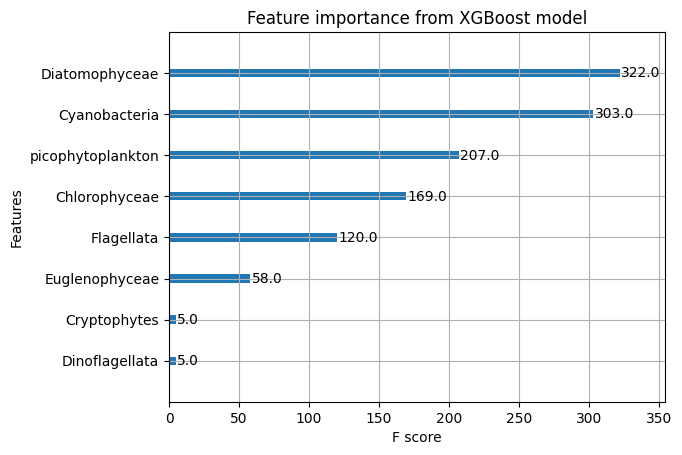

n_estimators=1000, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 68.08510638297872
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

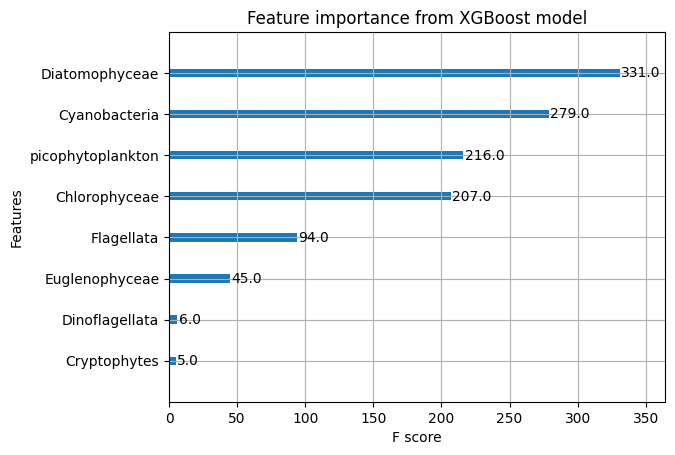

n_estimators=1000, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 63.829787234042556
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

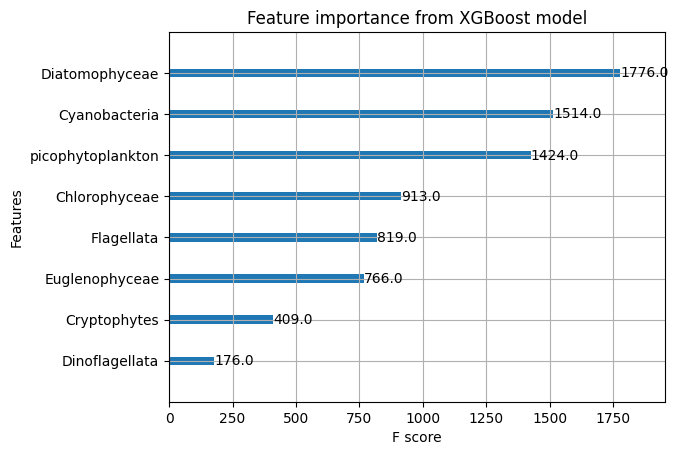

n_estimators=1000, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 61.702127659574465
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

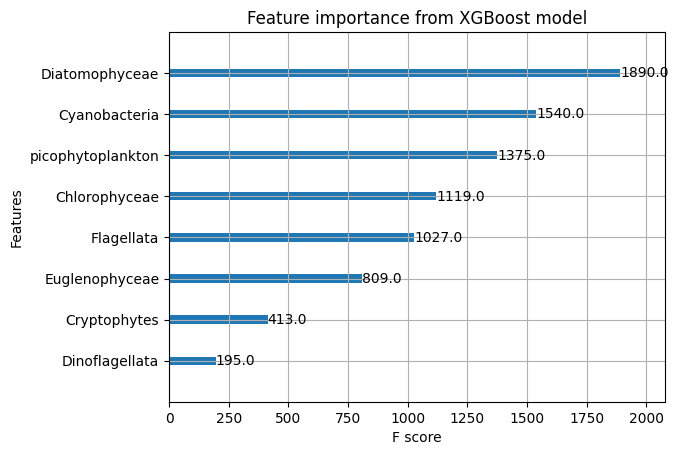

n_estimators=10, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 53.191489361702125
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

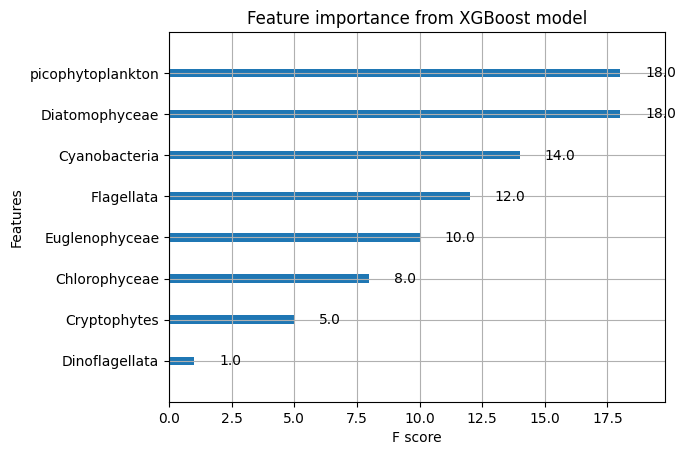

n_estimators=10, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 68.08510638297872
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

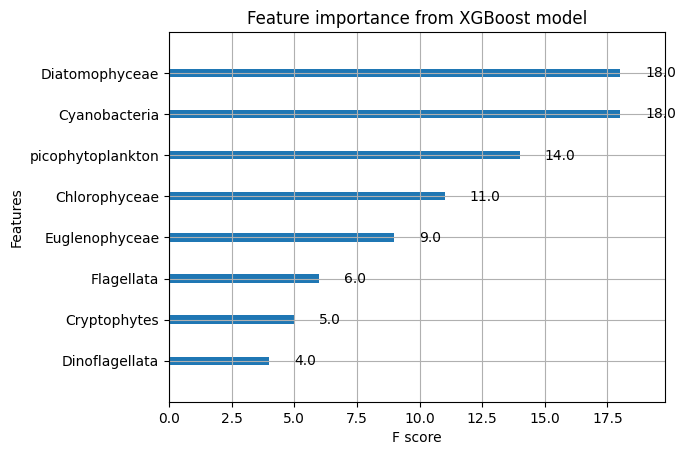

n_estimators=10, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 44.680851063829785
Accuracy of XGB Classifier on train data: 63.888888888888886


<Figure size 640x480 with 0 Axes>

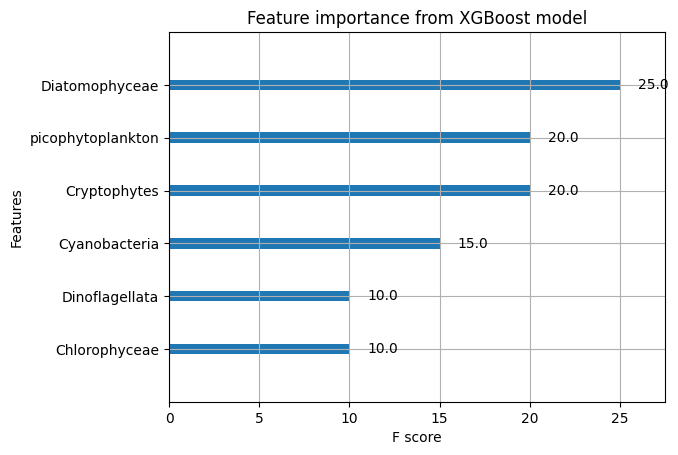

n_estimators=10, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 44.680851063829785
Accuracy of XGB Classifier on train data: 63.888888888888886


<Figure size 640x480 with 0 Axes>

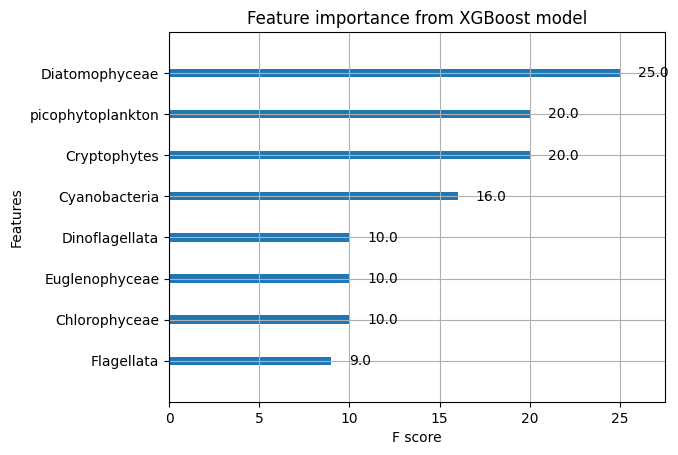

In [82]:
for est in n_estimators:
    for lr in learning_rate:
        for depth in max_depth:
            print('==================================================')
            print(f'n_estimators={est}, learning_rate={lr}, max_depth={depth}')
            print('==================================================')
            model = XGBClassifier(n_estimators=est, max_depth=depth, learning_rate=lr)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            model_score = accuracy_score(y_test, y_pred)
            print(f'Accuracy of XGB Classifier on test data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_test)
            
            y_pred = model.predict(X_train)
            model_score = accuracy_score(y_train, y_pred)
            print(f'Accuracy of XGB Classifier on train data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_train)
            
            plt.figure()
            plot_importance(model, title='Feature importance from XGBoost model')
            plt.show()

### Najwyższe accuracy na zbiorze testowym (61.7) osiągają hiperparametry: n_estimators=10, learning_rate=0.01, max_depth zarówno 5 i 20.

### Najniższe accuracy na zbiorze testowym (55.3) osiągają hiperparametry: n_estimators=1000, learning_rate=0.8, max_depth zarówno 5 i 20.

In [83]:
data = pd.read_csv('diabetes.csv')
data.dropna(inplace=True)

In [84]:
X = pd.get_dummies(data)
X = X.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


n_estimators=1000, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 76.19047619047619
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

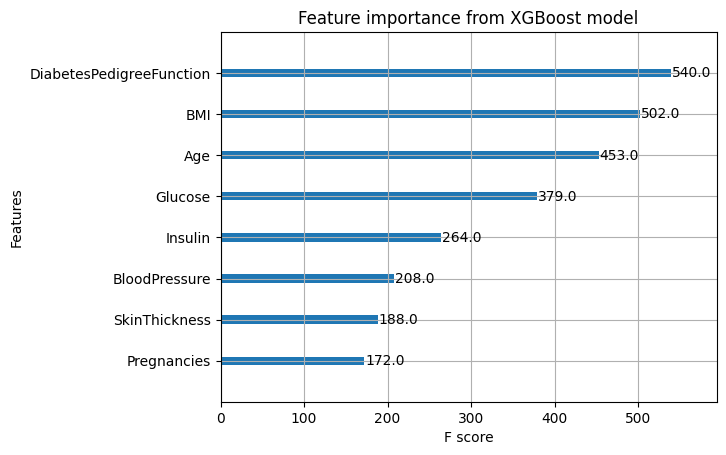

n_estimators=1000, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 73.16017316017316
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

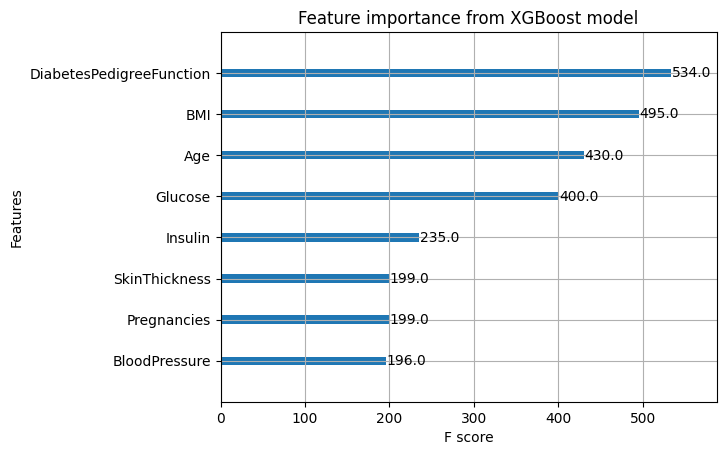

n_estimators=1000, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 74.89177489177489
Accuracy of XGB Classifier on train data: 99.06890130353817


<Figure size 640x480 with 0 Axes>

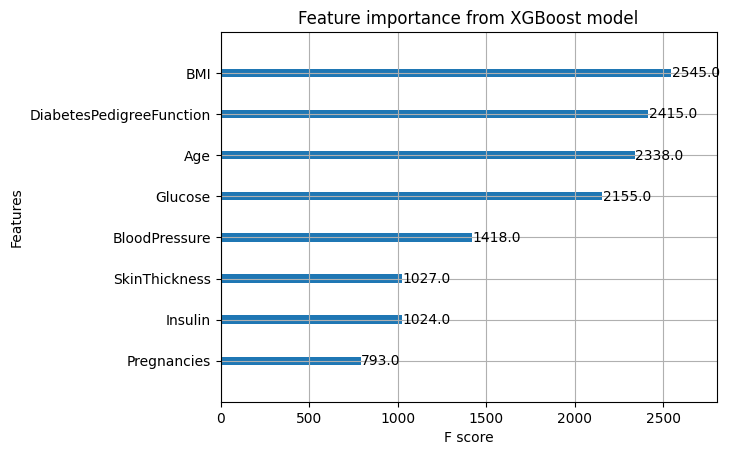

n_estimators=1000, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 73.16017316017316
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

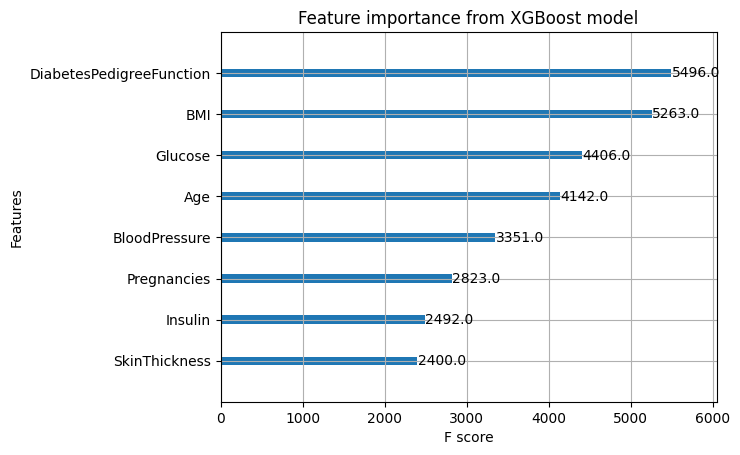

n_estimators=10, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 77.48917748917748
Accuracy of XGB Classifier on train data: 98.13780260707635


<Figure size 640x480 with 0 Axes>

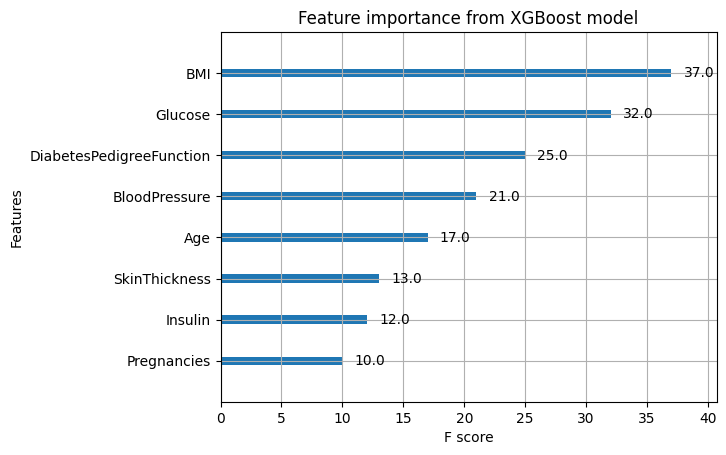

n_estimators=10, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 74.45887445887446
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

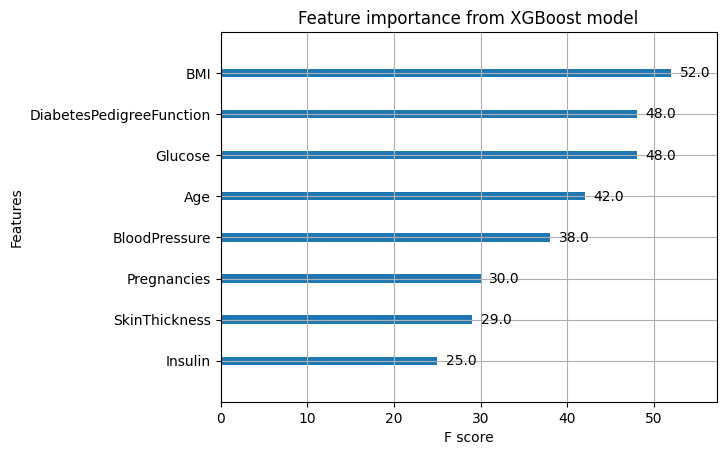

n_estimators=10, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 65.80086580086581
Accuracy of XGB Classifier on train data: 64.80446927374301


<Figure size 640x480 with 0 Axes>

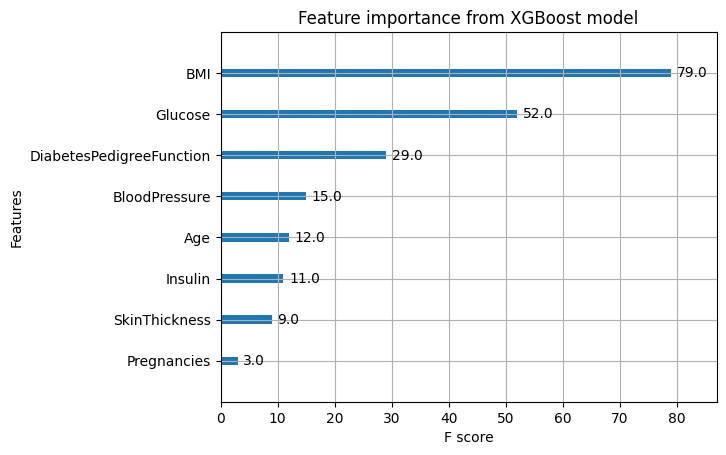

n_estimators=10, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 65.80086580086581
Accuracy of XGB Classifier on train data: 64.80446927374301


<Figure size 640x480 with 0 Axes>

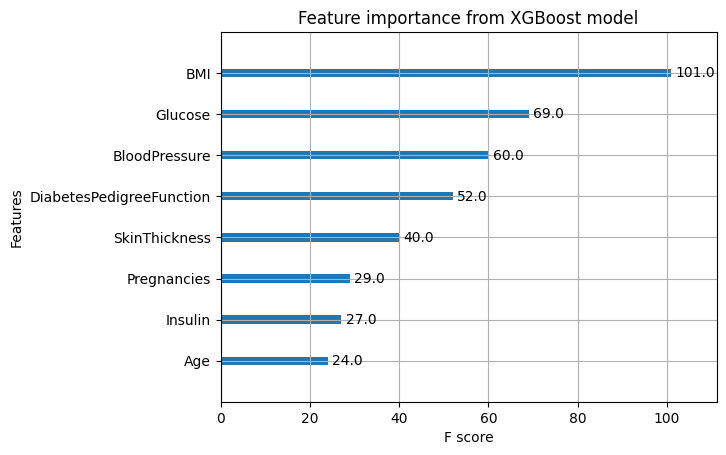

In [86]:
for est in n_estimators:
    for lr in learning_rate:
        for depth in max_depth:
            print('==================================================')
            print(f'n_estimators={est}, learning_rate={lr}, max_depth={depth}')
            print('==================================================')
            model = XGBClassifier(n_estimators=est, max_depth=depth, learning_rate=lr)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            model_score = accuracy_score(y_test, y_pred)
            print(f'Accuracy of XGB Classifier on test data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_test)
            
            y_pred = model.predict(X_train)
            model_score = accuracy_score(y_train, y_pred)
            print(f'Accuracy of XGB Classifier on train data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_train)
            
            plt.figure()
            plot_importance(model, title='Feature importance from XGBoost model')
            plt.show()

### Najwyższe accuracy na zbiorze testowym (75.3) osiągają hiperparametry: n_estimators=1000, learning_rate=0.01, max_depth=20.

### Najniższe accuracy na zbiorze testowym (66.6) osiągają hiperparametry: n_estimators=10, learning_rate=0.01, max_depth zarówno 5 i 20.